# Worksheet: Miniproject 2
In this worksheet the Mandelbrot set is calculated in the region $C=\{a+ib\ : \ a\in[-2,\ 1]\ b\in[-1.5,\ 1.5]\}$ of the complex plane. Throughout this worksheet $N$ denotes the number of "pixles" the region is split into. This means that $C$ will be represented by an $N\times N$ matrix. <br>
An iteration is carried out for each entry in $C$, where the number of iterations are counted and plotted as an intensity plot. The number 2 is used as an upper bound for when a point diverges, since the sequency defining the Mandelbrot set diverges for $|z|>2$.<br>
If not stated otherwise N=1000 and the maximum number of iterations is 10

List of old implementation execution times:
- Naive implementation: 14.980194687843323
- Vectorized implementation: 0.42690569162368774
- Numba implementation: 0.020418941974639893
- Multicore implementation1: 2.21570360660553

In [6]:
import importlib
import vectorized
import numbad_mirrored
import numbad
# import dask_simple

importlib.reload(vectorized)
importlib.reload(numbad_mirrored)
importlib.reload(numbad)
# importlib.reload(dask_simple)

import numpy as np
import matplotlib.pyplot as plt
import time


N = 1000
max_iter = 10

## Using different data types
The vectorized code is tested running either 32 or 64 bit floats. The average is taken over 4 runs of the code, and for different values of N.

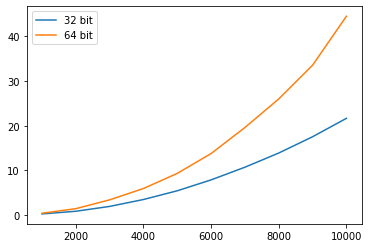

In [7]:
t32s = []
t64s = []
Ns = [N*j for j in range(1, 11)]
for j in range(1, 11):
    n = N*j
    t32 = 0
    t64 = 0
    for i in range(4):
        t0 = time.time()
        vectorized.mandelbrot(n, max_iter, bits=32)
        t1 = time.time()
        vectorized.mandelbrot(n, max_iter, bits=64)
        t2 = time.time()

        t32 += 0.25*(t1-t0)
        t64 += 0.25*(t2-t1)

    t32s.append(t32)
    t64s.append(t64)

plt.plot(Ns, t32s, label="32 bit")
plt.plot(Ns, t64s, label="64 bit")
plt.legend()
plt.show()

# Using dask to process multiple blocks at the same time
This should have been a comparison between the dask implementation versus the vectorized code, but the attached file "dask_simple.py" can be run as is, and the parameters can be tuned at the end of the file.

## Symmetry of the Mandelbrot Set
Just for a fun comparison, I did end up implementing a mirrored version of the *numba* library. A comparison between the two can be seen below

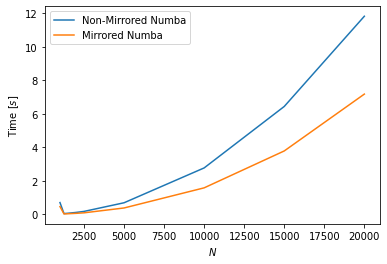

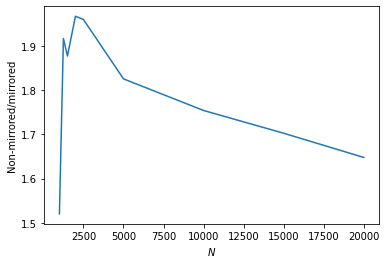

In [8]:
Ns = [1000, 1250, 1500, 2000, 2500, 5000, 10000, 15000, 20000]
times = []
times2 = []

for n in Ns:
    t0 = time.time()
    numba_mandelbrot = numbad.mandelbrot(n, max_iter=20)
    tnu = time.time() - t0
    times.append(tnu)

for n in Ns:
    t0 = time.time()
    numba_mandelbrot_mir = numbad_mirrored.mandelbrot(n, max_iter=20)
    tnu = time.time() - t0
    times2.append(tnu)

plt.plot(Ns, times, label="Non-Mirrored Numba")
plt.plot(Ns, times2, label="Mirrored Numba")
plt.xlabel(r"$N$")
plt.ylabel(r"Time $[s]$")
plt.legend()
plt.show()

times_faster = [times[i]/times2[i] for i in range(len(times))]
plt.plot(Ns, times_faster)
plt.xlabel(r"$N$")
plt.ylabel("Non-mirrored/mirrored")
plt.show()